In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Mini Proj/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


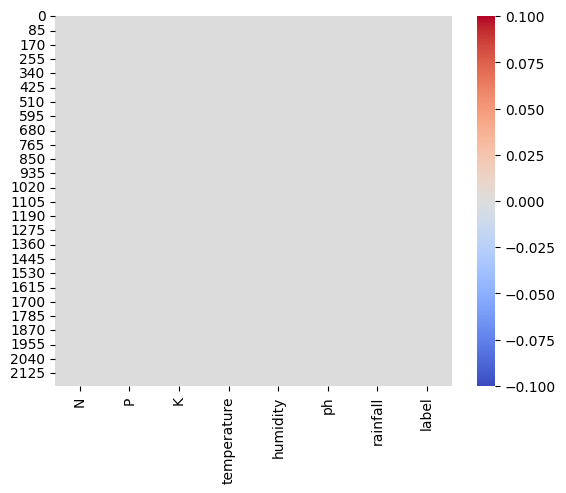

In [ ]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<Axes: xlabel='ph', ylabel='Density'>

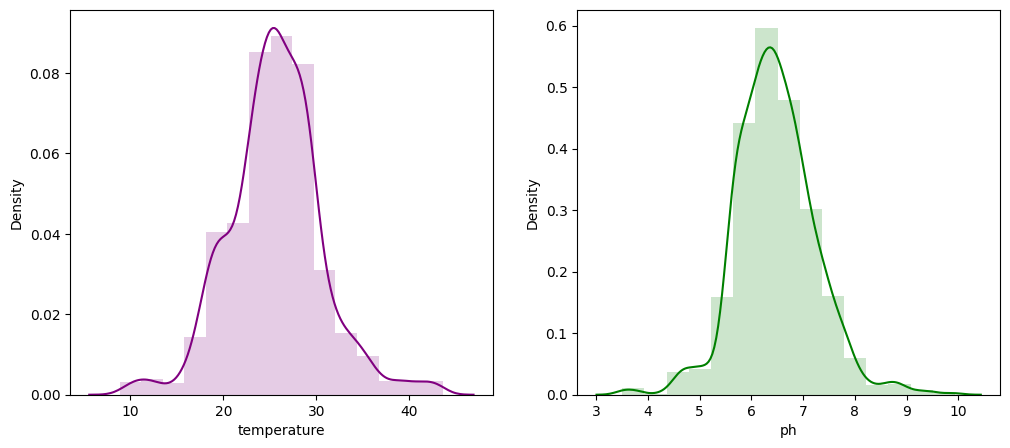

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<Axes: xlabel='count', ylabel='label'>

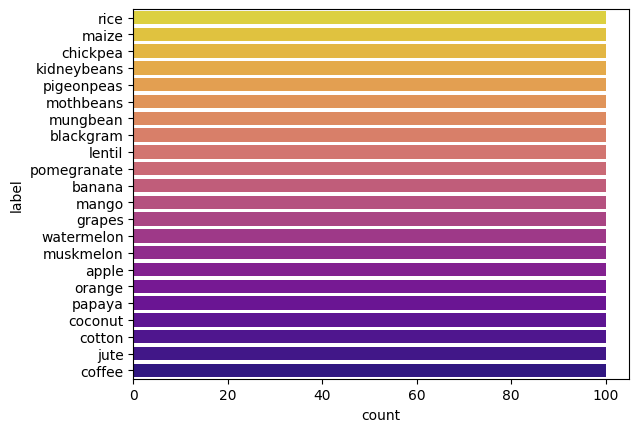

In [ ]:
sns.countplot(y='label',data=df, palette="plasma_r")

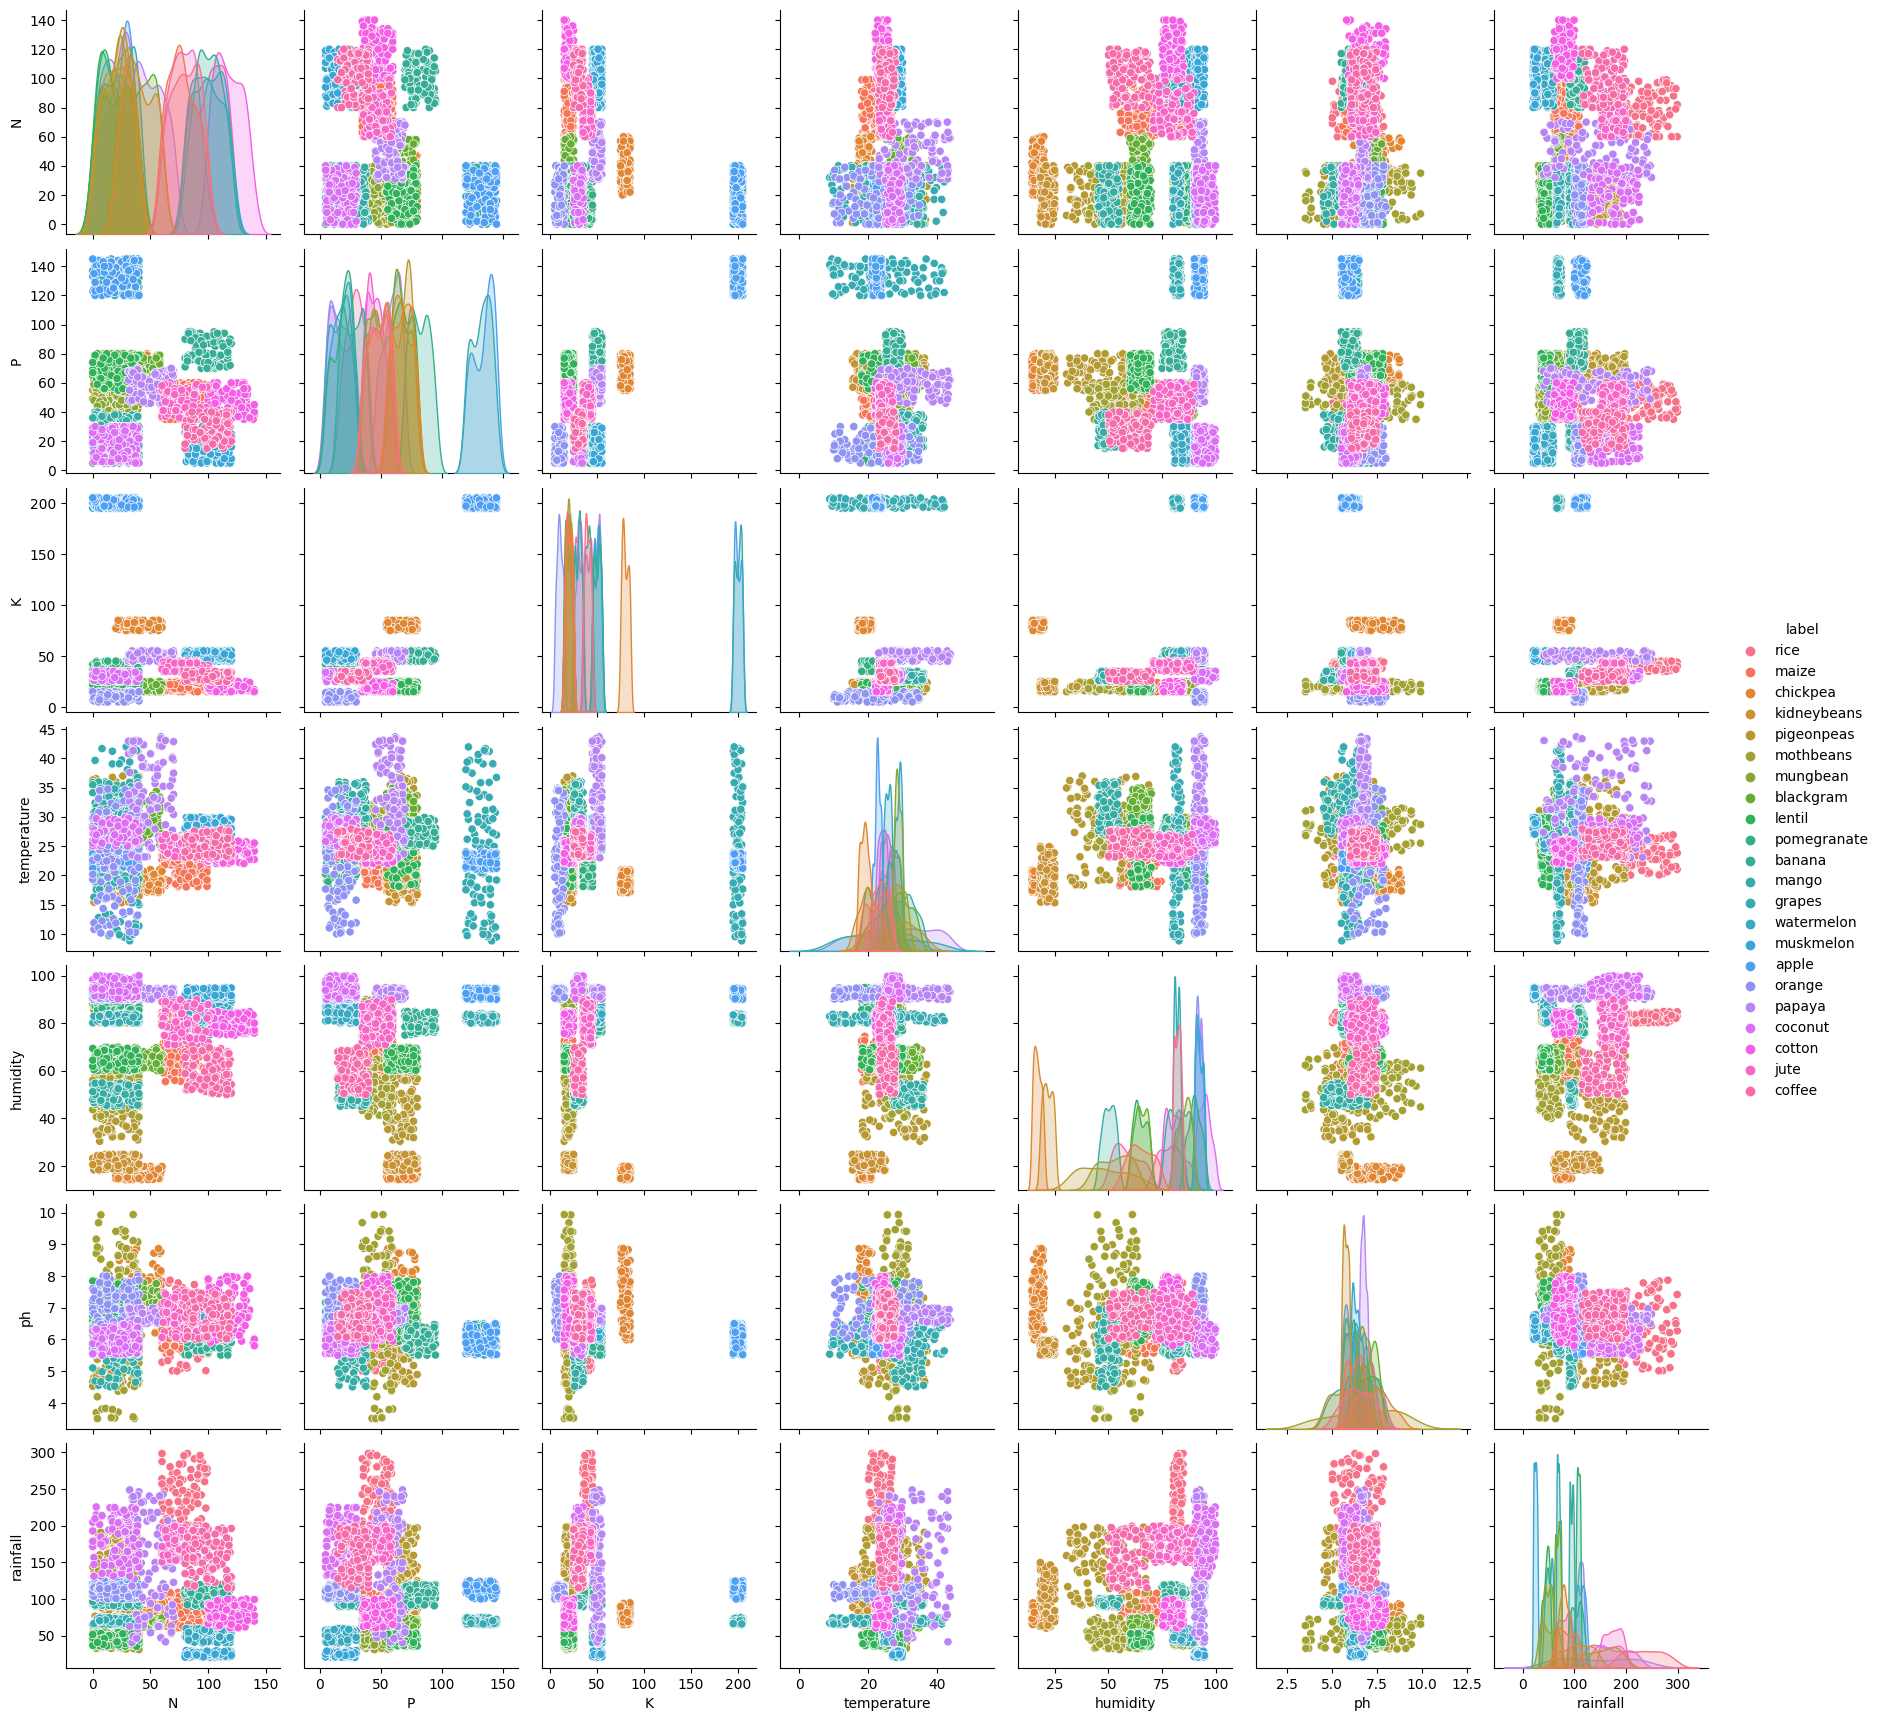

In [ ]:
sns.pairplot(df, hue = 'label')

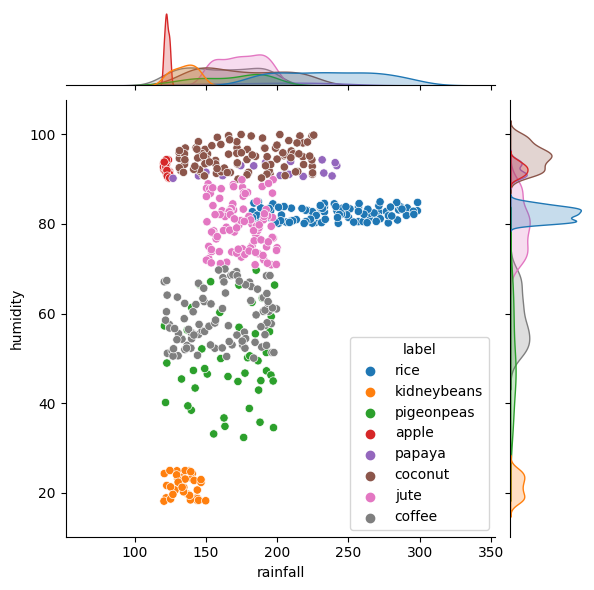

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

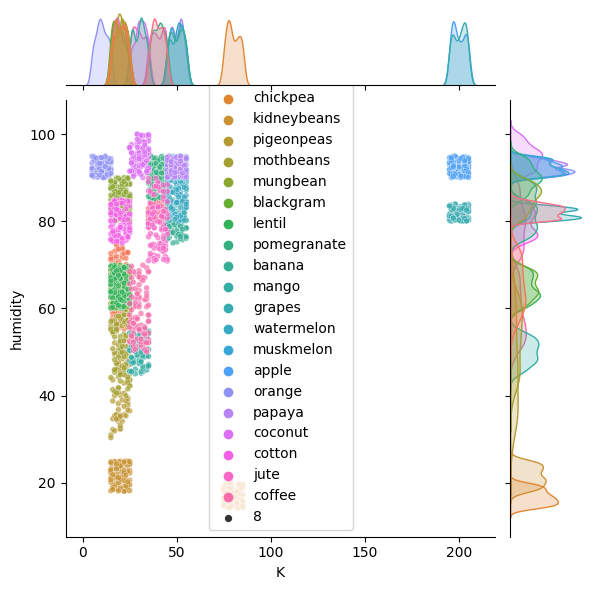

In [ ]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

<Axes: xlabel='ph', ylabel='label'>

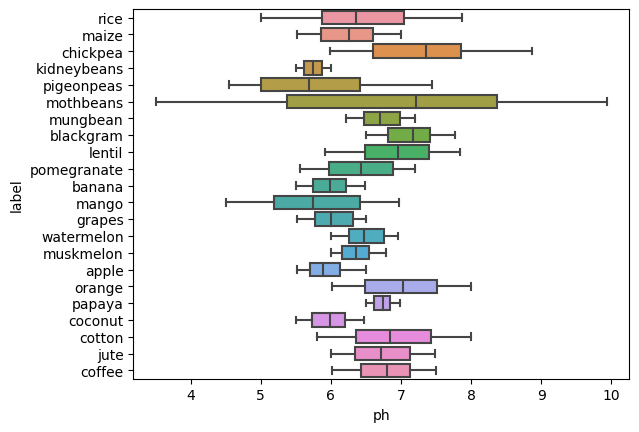

In [ ]:
sns.boxplot(y='label',x='ph',data=df)

<Axes: xlabel='P', ylabel='label'>

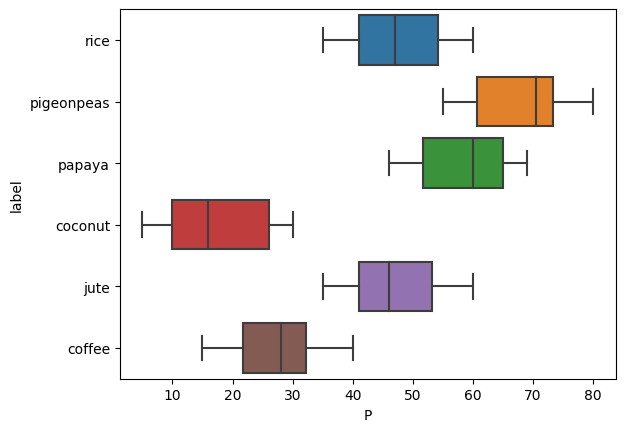

In [ ]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

<Axes: xlabel='K', ylabel='rainfall'>

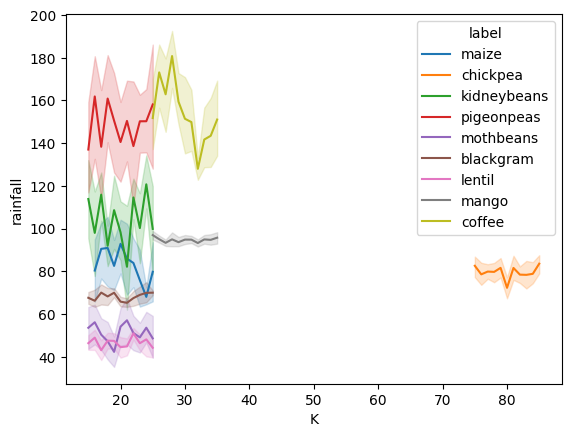

In [ ]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

In [ ]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

In [ ]:
print(targets)

{0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


<Axes: >

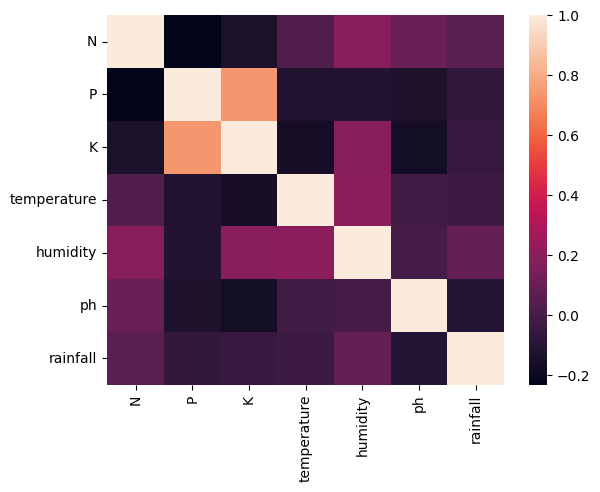

In [ ]:
sns.heatmap(X.corr())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

<Axes: >

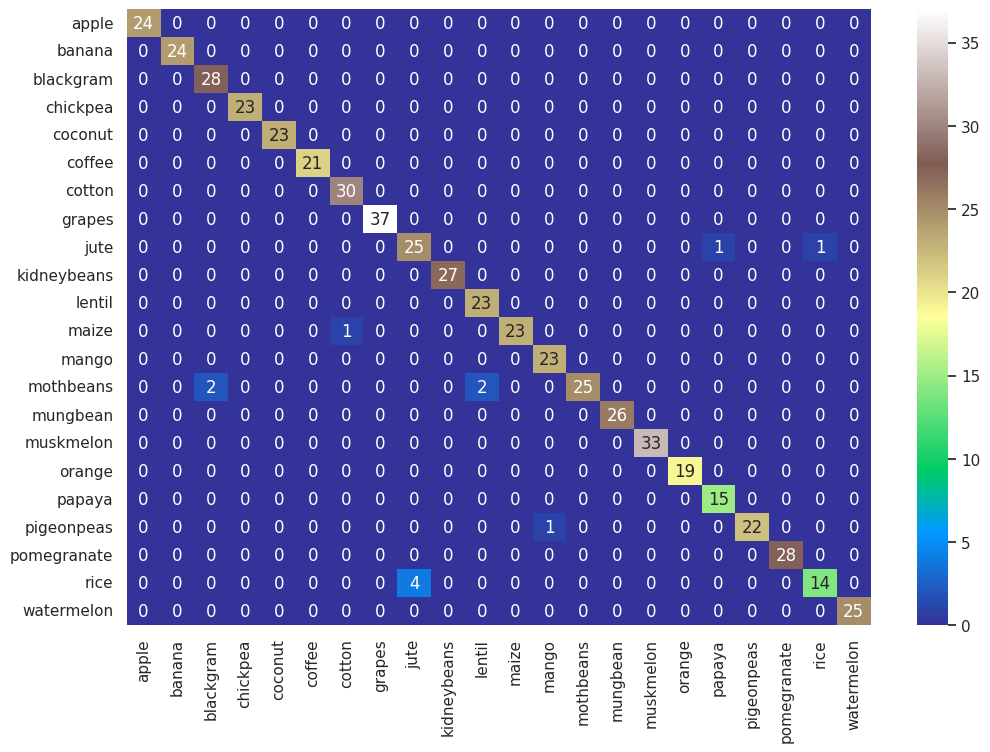

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

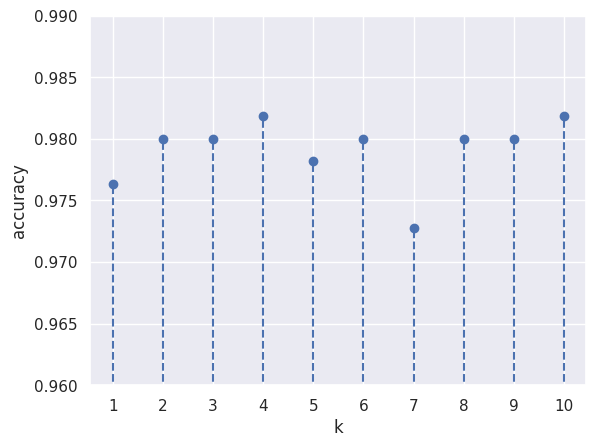

In [ ]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

In [ ]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.9872727272727273
Poly Kernel Accuracy:  0.9890909090909091


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
print(model.best_score_ )
print(model.best_params_ )

0.9866710547967747
{'C': 1.0, 'gamma': 0.001}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

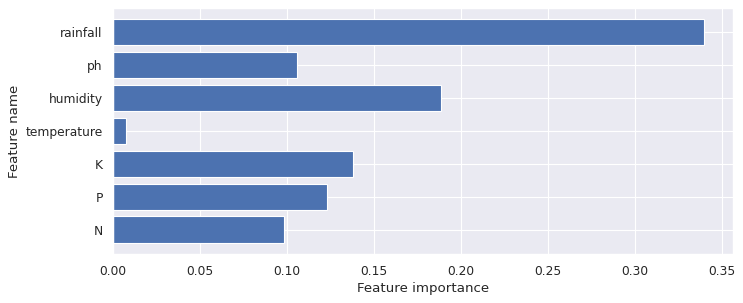

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


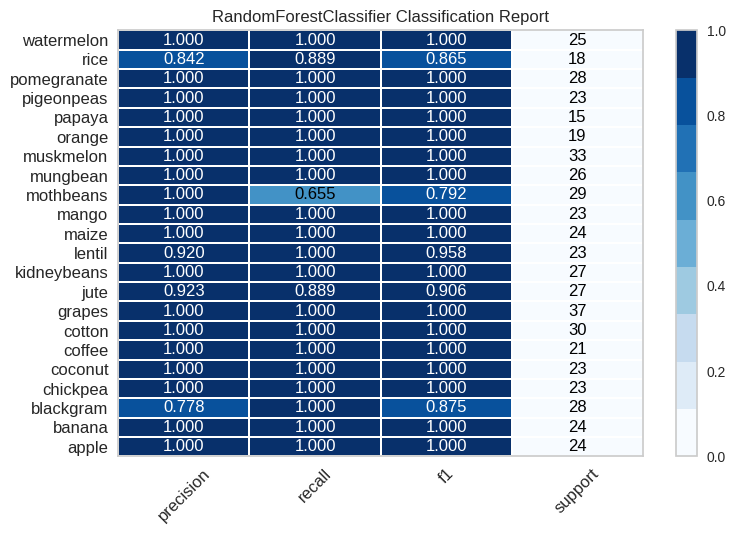

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))

Gradient Boosting accuracy : 0.9927272727272727


In [ ]:
def predictor(Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH, Rainfall):
    feature = [Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH, Rainfall]
    feature= np.array(feature).reshape((1, -1))
    pred=grad.predict(feature)
    #print(tagets)
    if int(pred[0]) == 0:
        res="apple"
        return res
    elif int(pred[0]) == 1.0:
        res="banana"
        return res
    elif int(pred[0]) == 2.0:
        res="blackgram"
        return res
    elif int(pred[0]) == 3.0:
        res="chickpea"
        return res
    elif int(pred[0]) == 4.0:
        res="coconut"
        return res
    elif int(pred[0]) == 5.0:
        res="coffee"
        return res
    elif int(pred[0]) == 6.0:
        res="cotton"
        return res
    elif int(pred[0]) == 7.0:
        res="grapes"
        return res
    elif int(pred[0]) == 8.0:
        res="jute"
        return res
    elif int(pred[0]) == 9.0:
        res="kidneybeans"
        return res
    elif int(pred[0]) == 10.0:
        res="lentil"
        return res
    elif int(pred[0]) == 11.0:
        res="maize"
        return res
    elif int(pred[0]) == 12.0:
        res="mango"
        return res
    elif int(pred[0]) == 13.0:
        res="mothbeans"
        return res
    elif int(pred[0]) == 14.0:
        res="mungbean"
        return res
    elif int(pred[0]) == 15.0:
        res="muskmelon"
        return res
    elif int(pred[0]) == 16.0:
        res="orange"
        return res
    elif int(pred[0]) == 17.0:
        res="papaya"
        return res
    elif int(pred[0]) == 18.0:
        res="pigeonpeas"
        return res
    elif int(pred[0]) == 19.0:
        res="pomegranate"
        return res
    elif int(pred[0]) == 20.0:
        res="rice"
        return res
    elif int(pred[0]) == 21.0:
        res="watermelon"
        return res

In [ ]:
N = input("Enter Nitrogen Content:")
P = input("Enter Phosphorus Content:")
K = input("Enter Potassium Content:")
Temp = input("Enter Temperature:")
Humid = input("Enter Humidity:")
pH = input("Enter pH of soil:")
Rain = input("Enter Rainfall in mm:")

print(predictor(N,P,K,Temp,Humid,pH,Rain))

Enter Nitrogen Content:119
Enter Phosphorus Content:25
Enter Potassium Content:51
Enter Temperature:26.47330219
Enter Humidity:80.92254421
Enter pH of soil:6.283818329
Enter Rainfall in mm:53.65742581
watermelon
